In [1]:
using Distributed
ifelse(nprocs()<2, addprocs(2), nothing);

In [2]:
using LinearAlgebra
using Plots
using Revise

┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1260


In [3]:
using LatticeQM

┌ Info: Precompiling LatticeQM [606d2a7e-9b17-11e9-1c5c-455b84f60309]
└ @ Base loading.jl:1260


### 2D supercell

In [4]:
lat = Geometries2D.honeycomb_twisted(7)
Structure.foldPC!(lat; shift=[1/3,1/3,0])

ks = kpath(lat; num_points=100)
# valley0 = Operators.valleyoperator(lat, x->1; spinhalf=false)
valley0 = Operators.valleyoperator(lat; spinhalf=false)

nothing

Twist α=4.408°   (n,m)=(7,1)


In [5]:
a1 = Structure.getA(Geometries2D.honeycomb(),1)
L = norm(Structure.getA(lat,1))
eL = Structure.getA(lat,1)/norm(Structure.getA(lat,1))
angle = acos(dot(eL,[0,1,0]))

1.5707963267948968

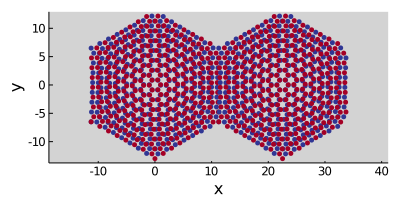

In [6]:
plot(lat, 3; markersize=3, supercell=[0:1], size=(400,200))

In [8]:
b = 8*π/(√3 * 3) /(6*2π);
angle = Structure.Lattices.twistangle(7)

0.07694205481465684

In [ ]:
hops = Operators.graphene(lat; format=:sparse, mode=:nospin, tz=0.12)
Operators.addinterlayerbias!(hops, lat, 0.15)
# Operators.peierlsinplane!(hops, lat, (-0.018)*[cos(2π/12),sin(2π/12)]);
Operators.peierlsinplane!(hops, lat, sqrt(3)*(b/L)*[cos(2π/12),sin(2π/12)])
valley1 = deepcopy(valley0)
Operators.peierlsinplane!(valley1, lat, sqrt(3)*(b/L)*[cos(2π/12),sin(2π/12)])

# bands1 = getbands(hops, ks, [valley0]; format=:sparse, num_bands=30)
ks = kpath(lat, ["γ", "γ1"]; num_points=100)
# ks = kpath(lat, ["μ2", "γ", "κ", "μ", "κ'", "γ", "μ"]; num_points=100)
bands = getbands(hops, ks, valley1; format=:sparse, num_bands=36)

nothing

Computing bands...  48%|███████████████▍                |  ETA: 0:00:25

In [ ]:
p1 = plot(bands; ylabel="\$\\varepsilon/t\$", size=(330,260), clims=(-1,1), colorbar=true)
# plot(p1; colorbar=true, clims=(-1,1), size=(400,200))

### 1D Ribbon 

In [63]:
lat = Geometries2D.honeycomb_twisted(7)
Structure.foldPC!(lat; shift=[1/3,1/3,0])

N=10
lat.basis[:,[1,2]] = lat.basis[:,[2,1]]
riblat = Structure.reduceto1D(lat, [[1, 0] [0, N]])
ks = kpath(riblat, ["Γ", "Γ2"]; num_points=100)

nothing

Twist α=4.408°   (n,m)=(7,1)


In [64]:
plot(riblat, 3; markersize=1, supercell=[0:1])

In [67]:
hops = Operators.graphene(riblat; format=:sparse, mode=:nospin, tz=0.12)
Operators.addinterlayerbias!(hops, riblat, 0.15)
Operators.peierlsinplane!(hops, riblat, sqrt(3)*(b/L)*[cos(2π/12),sin(2π/12)]);

pos = Operators.positionalong(riblat, Structure.basis(riblat,2))
posZ = Operators.positionalong(riblat, Structure.basis(riblat,3))

bands = getbands(hops, ks, pos; format=:sparse, num_bands=70)

nothing

Computing bands... 100%|████████████████████████████████| Time: 0:06:08


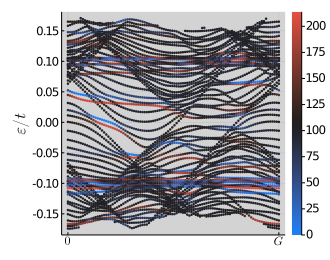

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /Users/skilledwolf/.julia/packages/Plots/zOV0T/src/backends/gr.jl:491


In [68]:
p1 = plot(bands; clims=(0,maximum(pos)), colorbar=true, csymmetric=false, ylabel="\$\\varepsilon/t\$", size=(330,260))